In [64]:
#Importing ibraries
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import mode
import joblib
import matplotlib.pyplot as plt

In [65]:
predictions = []

# Loading Datasets

In [66]:
#Loading the data for dataset_1
from google.colab import files
uploaded = files.upload()

Saving mail_data.csv to mail_data (1).csv


In [67]:
# Check if the file is open
if os.access("mail_data.csv", os.R_OK):
    data = pd.read_csv("mail_data.csv", encoding='ISO-8859-1')
else:
    print("File is open or you don't have permission to access it.")
data = pd.read_csv("mail_data.csv", encoding='ISO-8859-1')#Read the CSV file

In [68]:
#Loading the data for dataset_2
from google.colab import files
uploaded = files.upload()

Saving Spam-Classification.csv to Spam-Classification (1).csv


In [69]:
# Check if the file is open
if os.access("Spam-Classification.csv", os.R_OK):
    data2 = pd.read_csv("Spam-Classification.csv", encoding='ISO-8859-1')
else:
    print("File is open or you don't have permission to access it.")
data3 = pd.read_csv("Spam-Classification.csv", encoding='ISO-8859-1')#Read the CSV file

In [70]:
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [71]:
print(data2.head())

  ï»¿Class                                                SMS
0      ham   said kiss, kiss, i can't do the sound effects...
1      ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2     spam  (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3     spam  * FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4     spam  **FREE MESSAGE**Thanks for using the Auction S...


In [75]:
print(data.isnull().sum())

Category    0
Message     0
dtype: int64


In [73]:
print(data2.isnull().sum())

ï»¿Class    0
SMS         0
dtype: int64


In [76]:
# Combine the 'Category' and 'ï»¿Class' into a single labels Series
Y = pd.concat([data['Category'], data2['ï»¿Class']], ignore_index=True)

# Combine the 'Message' and 'SMS' into a single messages Series
X = pd.concat([data['Message'], data2['SMS']], ignore_index=True)

X,Y

(0       Go until jurong point, crazy.. Available only ...
 1                           Ok lar... Joking wif u oni...
 2       Free entry in 2 a wkly comp to win FA Cup fina...
 3       U dun say so early hor... U c already then say...
 4       Nah I don't think he goes to usf, he lives aro...
                               ...                        
 7067         Yup, no need. I'll jus wait 4 e rain 2 stop.
 7068    Yup... From what i remb... I think should be c...
 7069                           Yup... How ÃÂ¼ noe leh...
 7070    Yup... Ok i go home look at the timings then i...
 7071    <Forwarded from 21870000>Hi - this is your Mai...
 Length: 7072, dtype: object,
 0        ham
 1        ham
 2       spam
 3        ham
 4        ham
         ... 
 7067     ham
 7068     ham
 7069     ham
 7070     ham
 7071    spam
 Length: 7072, dtype: object)

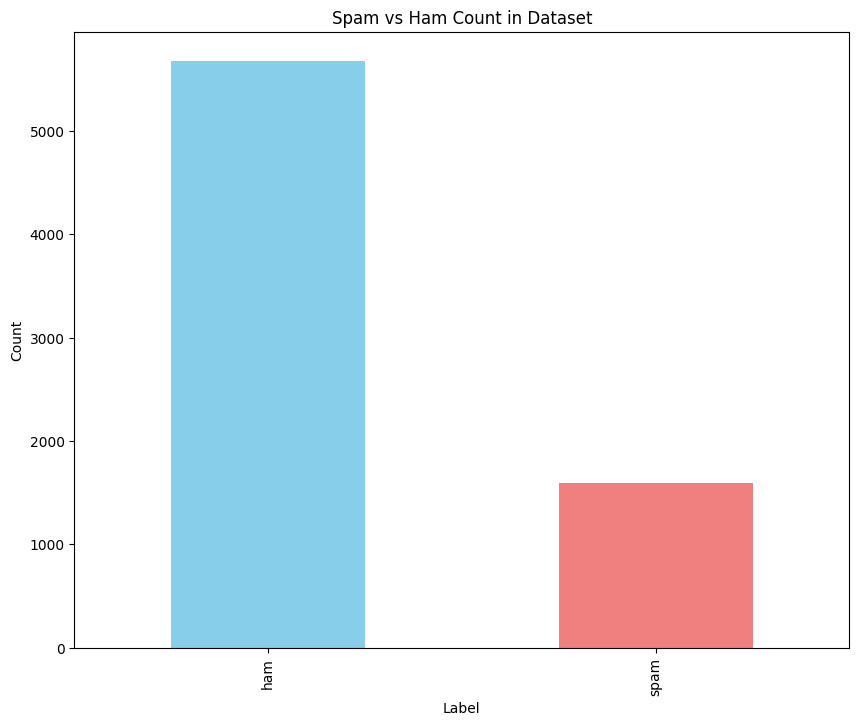

In [77]:
label_counts = data['Category'].value_counts() + data2['ï»¿Class'].value_counts()+100

plt.figure(figsize=(10,8))
label_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])

plt.title('Spam vs Ham Count in Dataset')
plt.xlabel('Label')
plt.ylabel('Count')

plt.show()

# Preparing, Training and Testing Datasets

In [78]:
# Changing the labels from 'ham' and 'spam' to 0 and 1
Y=LabelEncoder().fit_transform(Y)

In [79]:
# Splitting the data into training and testing sets (80/20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [80]:
# Converting the messages into numerical format using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()
X_train_tfidf, X_test_tfidf

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

# Using Logistic Regression

In [81]:
#Training the model
model = LogisticRegression()

In [82]:
model.fit(X_train_tfidf, Y_train)

LogisticRegression()

In [83]:
#Accuracy for the training data
prediction_on_training_data = model.predict(X_train_tfidf)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)


In [84]:
#Printing the accuracy for the training data
print('Accuracy on training data: ', accuracy_on_training_data)

Accuracy on training data:  0.9796712038182782


In [85]:
#Accuracy for the test data
prediction_on_test_data = model.predict(X_test_tfidf)
accuracy_on_test_data_LR = accuracy_score(Y_test, prediction_on_test_data)

In [107]:
#Printing the accuracy for the test data
print('Accuracy on test data: ', accuracy_on_test_data_LR)

# Convert predictions to a list if it's not already
if not isinstance(predictions, list):
    predictions = predictions.tolist()

predictions.append(prediction_on_test_data)

joblib.dump(model, 'LogisticR_model.pkl')

Accuracy on test data:  0.9780918727915194


['LogisticR_model.pkl']

In [108]:
#Prediction and testing the model

input_your_mail = ['Free entry in 2 a wkly comp to win FA Final tkts @21st October 2024. Send FA to 24157321 to receive entry question(std txt rate) TCs applied 12653258-75`5924']

#Converting the text to feature vector
input_data_features = vectorizer.transform(input_your_mail)

prediction = model.predict(input_data_features)

print(prediction)

if(prediction[0]==0):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Spam mail


# Using Random Forest

In [109]:
# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, Y_train)

RandomForestClassifier(random_state=42)

In [110]:
# Make predictions and evaluate
Y_pred = rf_model.predict(X_test_tfidf)

In [111]:
# Calculate accuracy
accuracyrf = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracyrf:.2f}')

# Convert predictions to a list if it's not already
if not isinstance(predictions, list):
    predictions = predictions.tolist()

predictions.append(Y_pred)

joblib.dump(rf_model, 'rf_model.pkl')

Accuracy: 1.00


['rf_model.pkl']

In [112]:
#Prediction and testing the model

input_your_mail = ['Free entry in 2 a wkly comp to win FA Final tkts @21st October 2024. Send FA to 24157321 to receive entry question(std txt rate) TCs applied 12653258-75`5924']

#Converting the text to feature vector
input_data_features = vectorizer.transform(input_your_mail)

prediction = rf_model.predict(input_data_features)

print(prediction)

if(prediction[0]==0):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Spam mail


# Descision Tree

In [113]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_tfidf, Y_train)

DecisionTreeClassifier(random_state=42)

In [114]:
# Make predictions and evaluate
Y_pred = dt_model.predict(X_test_tfidf)
Y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [115]:
# Calculate accuracy
accuracydt = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracydt:.2f}')

# Convert predictions to a list if it's not already
if not isinstance(predictions, list):
    predictions = predictions.tolist()

predictions.append(Y_pred)
joblib.dump(dt_model, 'dt_model.pkl')

Accuracy: 0.99


['dt_model.pkl']

In [116]:
#Prediction and testing the model

input_your_mail = ['Free entry in 2 a wkly comp to win FA Final tkts @21st October 2024. Send FA to 24157321 to receive entry question(std txt rate) TCs applied 12653258-75`5924']

#Converting the text to feature vector
input_data_features = vectorizer.transform(input_your_mail)

prediction = dt_model.predict(input_data_features)

print(prediction)

if(prediction[0]==0):
  print('Ham mail')
else:
  print('Spam mail')

[1]
Spam mail


# Using Ensamble

In [118]:
# Combine predictions using majority voting
predictions= np.array(predictions)
from collections import Counter

# Manually compute mode for each column
result = []
for col in predictions.T:  # Transpose to iterate over columns
    count = Counter(col)  # Count occurrences
    most_common_value = count.most_common(1)[0][0]  # Get the most common value
    result.append(most_common_value)

ensemble_pred = np.array(result)  # Convert the result back to a numpy array


accuracy = accuracy_score(Y_test, ensemble_pred)
print(f'Ensemble Accuracy: {accuracy:.4f}')

Ensemble Accuracy: 0.9972


# Comparing Results

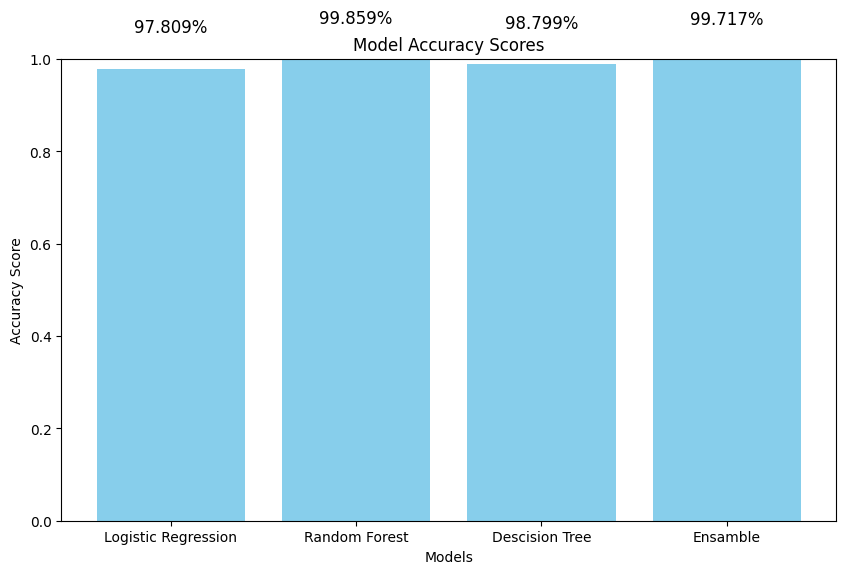

In [119]:
import matplotlib.pyplot as plt

# Example data
models = ['Logistic Regression','Random Forest','Descision Tree','Ensamble']  # Replace with your model names
accuracy_scores = [accuracy_on_test_data_LR,accuracyrf,accuracydt,accuracy] # Replace with your accuracy scores

# Create a bar plot
plt.figure(figsize=(10, 6))  # Set figure size
plt.bar(models, accuracy_scores, color='skyblue')  # Create bars

# Add title and labels
plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set y-axis limit between 0 and 1

# Add accuracy scores on top of the bars
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.07, f'{(score*100):.3f}%', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()